# Lab 9

In [4]:
import numpy as np 
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance

## Part 3

### Compound Dataset

In [73]:
#importing the data 
#Load the data
compound_data = pd.read_csv("../data/compound.txt", sep="\t", header = None)
compound_data.columns = ['feature_1', 'feature_2', 'class']
compound_data_new = compound_data.drop('class', axis=1)
compound_data_new.head()

,feature_1,feature_2
0,26.75,22.15
1,29.80,22.15
2,31.55,21.10
3,27.70,20.85
4,29.90,19.95


In [74]:
N,d = compound_data_new.shape
compound_data_new_delta = pd.DataFrame(100*np.divide(compound_data_new.iloc[1:,:].values-compound_data_new.iloc[:N-1,:].values, 
                                   compound_data_new.iloc[:N-1,:].values), columns=compound_data_new.columns, 
                                   index=compound_data_new.iloc[1:].index)
compound_data_new_delta.head()

,feature_1,feature_2
1,11.401869,0.000000
2,5.872483,-4.740406
3,-12.202853,-1.184834
4,7.942238,-4.316547
5,-10.367893,-4.511278


#### Relative Density = Inverse of Distance:

##### k=2

In [75]:
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(compound_data_new_delta.values)
distances, indices = nbrs.kneighbors(compound_data_new_delta.values)

inverse_distances_1 = 1/distances
anomaly_score_1 = inverse_distances_1[:,knn-1]

anom = pd.DataFrame(anomaly_score_1, index=compound_data_new_delta.index, columns=['Anomaly score'])
result = pd.concat((compound_data_new_delta,anom), axis=1)
result.nlargest(5,'Anomaly score') #top-5 points

<ipython-input-75-ef115ad02bfd>:5: RuntimeWarning: divide by zero encountered in true_divide
  inverse_distances_1 = 1/distances


,feature_1,feature_2,Anomaly score
128,-1.408451,-2.461538,24.642691
330,-1.369863,-2.448980,24.642691
79,-1.328021,-2.459016,23.240292
221,-3.110048,-3.910615,23.093965
277,-3.112840,-3.867403,23.093965


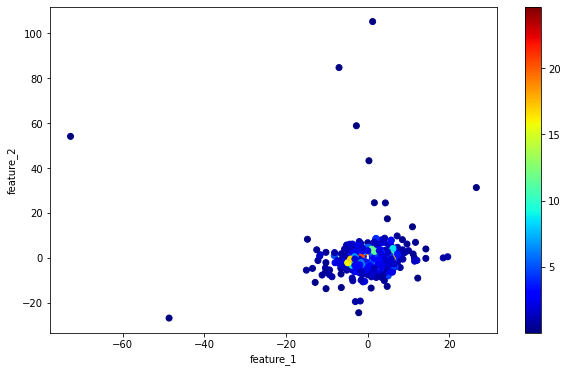

In [76]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(compound_data_new_delta.feature_1,compound_data_new_delta.feature_2,c=anomaly_score_1,cmap='jet')
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
fig.colorbar(p)
plt.show()

##### k=5

In [77]:
knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(compound_data_new_delta.values)
distances, indices = nbrs.kneighbors(compound_data_new_delta.values)

inverse_distances_2 = 1/distances
anomaly_score_2 = inverse_distances_2[:,knn-1]

anom = pd.DataFrame(anomaly_score_2, index=compound_data_new_delta.index, columns=['Anomaly score'])
result = pd.concat((compound_data_new_delta,anom), axis=1)
result.nlargest(5,'Anomaly score') #top-5 points

<ipython-input-77-cd8aa23a732c>:5: RuntimeWarning: divide by zero encountered in true_divide
  inverse_distances_2 = 1/distances


,feature_1,feature_2,Anomaly score
132,1.075269,-2.484472,3.628761
62,-1.477105,-0.547945,3.405075
105,-1.499250,-0.586510,3.215318
116,1.259843,-2.380952,3.208860
52,-1.369863,-2.046036,3.120812


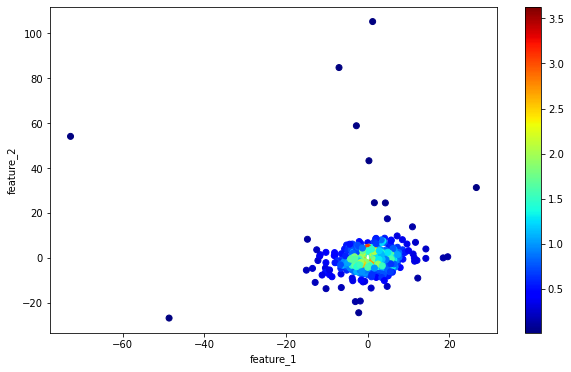

In [78]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(compound_data_new_delta.feature_1,compound_data_new_delta.feature_2,c=anomaly_score_2,cmap='jet')
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
fig.colorbar(p)
plt.show()

#### Relative Density = Inverse of Average Distance:

In [80]:
anomaly_score_avg = (anomaly_score_1 + anomaly_score_2) / 2

anom = pd.DataFrame(anomaly_score_avg, index=compound_data_new_delta.index, columns=['Anomaly score'])
result = pd.concat((compound_data_new_delta,anom), axis=1)
result.nlargest(5,'Anomaly score') #top-5 points

,feature_1,feature_2,Anomaly score
128,-1.408451,-2.461538,13.647238
330,-1.369863,-2.448980,13.633497
62,-1.477105,-0.547945,12.945771
105,-1.499250,-0.586510,12.850893
79,-1.328021,-2.459016,12.839308


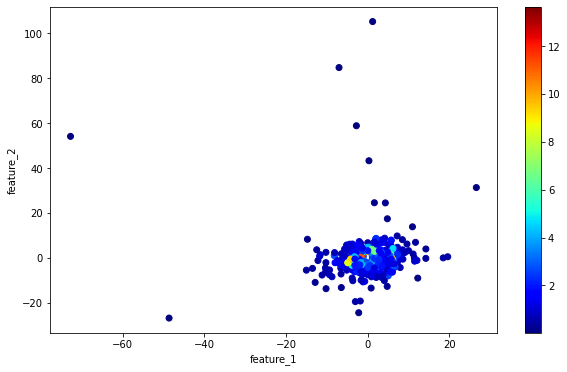

In [81]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(compound_data_new_delta.feature_1,compound_data_new_delta.feature_2,c=anomaly_score_avg,cmap='jet')
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
fig.colorbar(p)
plt.show()

### Flame Dataset

In [82]:
#importing the data 
#Load the data
flame_data = pd.read_csv("../data/flame.txt", sep="\t", header = None)
flame_data.columns = ['feature_1', 'feature_2', 'class']
flame_data_new = flame_data.drop('class', axis=1)
flame_data_new.head()

,feature_1,feature_2
0,1.85,27.80
1,1.35,26.65
2,1.40,23.25
3,0.85,23.05
4,0.50,22.35


In [83]:
N,d = flame_data_new.shape
flame_data_new_delta = pd.DataFrame(100*np.divide(flame_data_new.iloc[1:,:].values-flame_data_new.iloc[:N-1,:].values, 
                                   flame_data_new.iloc[:N-1,:].values), columns=flame_data_new.columns, 
                                   index=flame_data_new.iloc[1:].index)
flame_data_new_delta.head()

,feature_1,feature_2
1,-27.027027,-4.136691
2,3.703704,-12.757974
3,-39.285714,-0.860215
4,-41.176471,-3.036876
5,30.000000,-4.474273


#### Relative Density = Inverse of Distance:

##### k=2

In [84]:
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(flame_data_new_delta.values)
distances, indices = nbrs.kneighbors(flame_data_new_delta.values)

inverse_distances_1 = 1/distances
anomaly_score_1 = inverse_distances_1[:,knn-1]

anom = pd.DataFrame(anomaly_score_1, index=flame_data_new_delta.index, columns=['Anomaly score'])
result = pd.concat((flame_data_new_delta,anom), axis=1)
result.nlargest(5,'Anomaly score') #top-5 points

<ipython-input-84-8ce9099ea632>:5: RuntimeWarning: divide by zero encountered in true_divide
  inverse_distances_1 = 1/distances


,feature_1,feature_2,Anomaly score
105,-7.103825,-1.827676,24.425693
206,-7.070707,-1.803607,24.425693
72,9.629630,-0.613497,19.546904
228,9.677419,-0.595238,19.546904
83,-3.105590,3.030303,14.269081


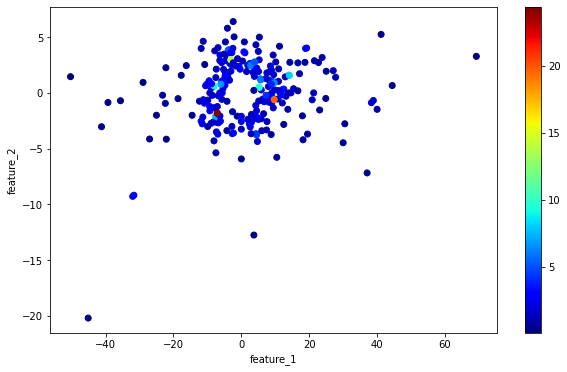

In [85]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(flame_data_new_delta.feature_1,flame_data_new_delta.feature_2,c=anomaly_score_1,cmap='jet')
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
fig.colorbar(p)
plt.show()

##### k=5

In [86]:
knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(flame_data_new_delta.values)
distances, indices = nbrs.kneighbors(flame_data_new_delta.values)

inverse_distances_2 = 1/distances
anomaly_score_2 = inverse_distances_2[:,knn-1]

anom = pd.DataFrame(anomaly_score_2, index=flame_data_new_delta.index, columns=['Anomaly score'])
result = pd.concat((flame_data_new_delta,anom), axis=1)
result.nlargest(5,'Anomaly score') #top-5 points

<ipython-input-86-464b78a461b2>:5: RuntimeWarning: divide by zero encountered in true_divide
  inverse_distances_2 = 1/distances


,feature_1,feature_2,Anomaly score
50,-7.438017,-2.197802,1.855975
71,-7.534247,-2.102102,1.813786
101,-2.955665,2.542373,1.734067
206,-7.070707,-1.803607,1.726688
83,-3.105590,3.030303,1.699045


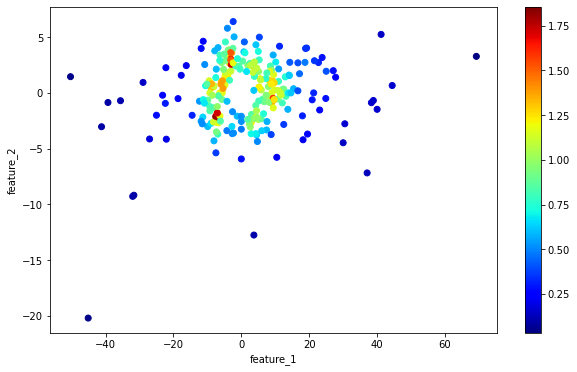

In [87]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(flame_data_new_delta.feature_1,flame_data_new_delta.feature_2,c=anomaly_score_2,cmap='jet')
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
fig.colorbar(p)
plt.show()

#### Relative Density = Inverse of Average Distance:

In [88]:
anomaly_score_avg = (anomaly_score_1 + anomaly_score_2) / 2

anom = pd.DataFrame(anomaly_score_avg, index=flame_data_new_delta.index, columns=['Anomaly score'])
result = pd.concat((flame_data_new_delta,anom), axis=1)
result.nlargest(5,'Anomaly score') #top-5 points

,feature_1,feature_2,Anomaly score
206,-7.070707,-1.803607,13.076190
105,-7.103825,-1.827676,13.040085
72,9.629630,-0.613497,10.428299
228,9.677419,-0.595238,10.401823
83,-3.105590,3.030303,7.984063


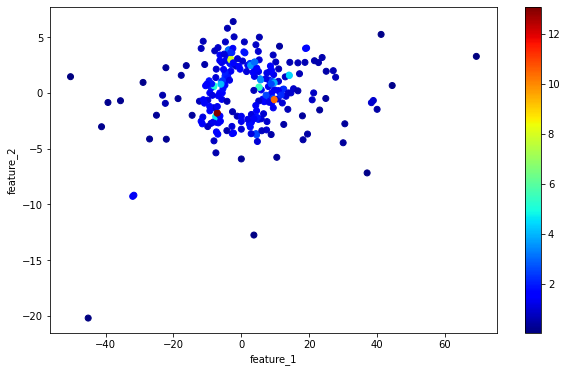

In [90]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(flame_data_new_delta.feature_1,flame_data_new_delta.feature_2,c=anomaly_score_avg,cmap='jet')
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
fig.colorbar(p)
plt.show()

### Pathbased Dataset

In [91]:
#importing the data 
#Load the data
pathbased_data = pd.read_csv("../data/pathbased.txt", sep="\t", header = None)
pathbased_data.columns = ['feature_1', 'feature_2', 'class']
pathbased_data_new = pathbased_data.drop('class', axis=1)
pathbased_data_new.head()

,feature_1,feature_2
0,11.25,5.05
1,10.95,4.70
2,9.85,5.80
3,9.80,5.75
4,9.15,6.80


In [92]:
N,d = pathbased_data_new.shape
pathbased_data_new_delta = pd.DataFrame(100*np.divide(pathbased_data_new.iloc[1:,:].values-pathbased_data_new.iloc[:N-1,:].values, 
                                   pathbased_data_new.iloc[:N-1,:].values), columns=pathbased_data_new.columns, 
                                   index=pathbased_data_new.iloc[1:].index)
pathbased_data_new_delta.head()

,feature_1,feature_2
1,-2.666667,-6.930693
2,-10.045662,23.404255
3,-0.507614,-0.862069
4,-6.632653,18.260870
5,-5.464481,-2.941176


#### Relative Density = Inverse of Distance:

##### k=2

In [93]:
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(pathbased_data_new_delta.values)
distances, indices = nbrs.kneighbors(pathbased_data_new_delta.values)

inverse_distances_1 = 1/distances
anomaly_score_1 = inverse_distances_1[:,knn-1]

anom = pd.DataFrame(anomaly_score_1, index=pathbased_data_new_delta.index, columns=['Anomaly score'])
result = pd.concat((pathbased_data_new_delta,anom), axis=1)
result.nlargest(5,'Anomaly score') #top-5 points

<ipython-input-93-d4760d58b7ee>:5: RuntimeWarning: divide by zero encountered in true_divide
  inverse_distances_1 = 1/distances


,feature_1,feature_2,Anomaly score
154,0.980392,0.898204,27.384061
289,0.983607,0.934579,27.384061
47,0.000000,2.138158,23.613023
284,0.000000,2.095808,23.613023
127,0.199203,2.040816,23.278854


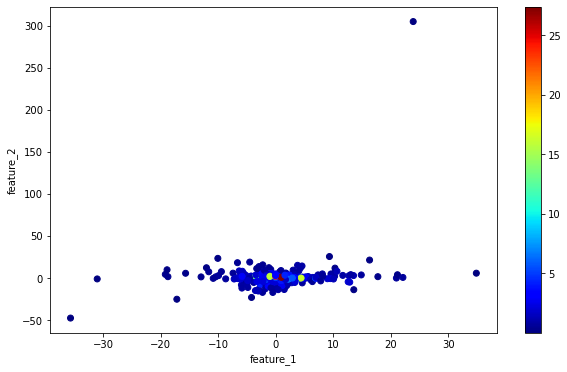

In [94]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(pathbased_data_new_delta.feature_1,pathbased_data_new_delta.feature_2,c=anomaly_score_1,cmap='jet')
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
fig.colorbar(p)
plt.show()

##### k=5

In [95]:
knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(pathbased_data_new_delta.values)
distances, indices = nbrs.kneighbors(pathbased_data_new_delta.values)

inverse_distances_2 = 1/distances
anomaly_score_2 = inverse_distances_2[:,knn-1]

anom = pd.DataFrame(anomaly_score_2, index=pathbased_data_new_delta.index, columns=['Anomaly score'])
result = pd.concat((pathbased_data_new_delta,anom), axis=1)
result.nlargest(5,'Anomaly score') #top-5 points

<ipython-input-95-6c8237f24220>:5: RuntimeWarning: divide by zero encountered in true_divide
  inverse_distances_2 = 1/distances


,feature_1,feature_2,Anomaly score
47,0.000000,2.138158,3.740550
284,0.000000,2.095808,3.229037
220,2.403846,0.000000,3.149073
221,2.347418,-0.312500,3.101511
151,2.268041,0.000000,2.989707


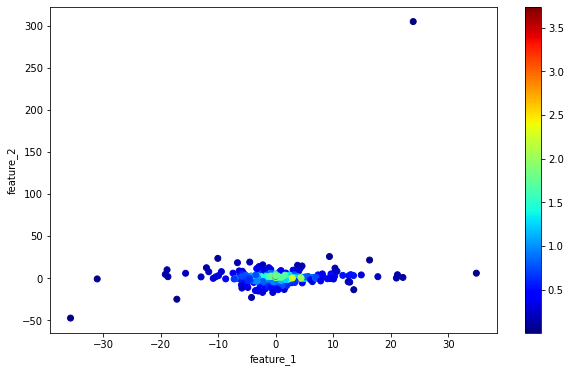

In [96]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(pathbased_data_new_delta.feature_1,pathbased_data_new_delta.feature_2,c=anomaly_score_2,cmap='jet')
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
fig.colorbar(p)
plt.show()

#### Relative Density = Inverse of Average Distance:

In [97]:
anomaly_score_avg = (anomaly_score_1 + anomaly_score_2) / 2

anom = pd.DataFrame(anomaly_score_avg, index=pathbased_data_new_delta.index, columns=['Anomaly score'])
result = pd.concat((pathbased_data_new_delta,anom), axis=1)
result.nlargest(5,'Anomaly score') #top-5 points

,feature_1,feature_2,Anomaly score
289,0.983607,0.934579,14.566197
154,0.980392,0.898204,14.565174
47,0.000000,2.138158,13.676786
284,0.000000,2.095808,13.421030
183,0.205339,2.083333,12.948192


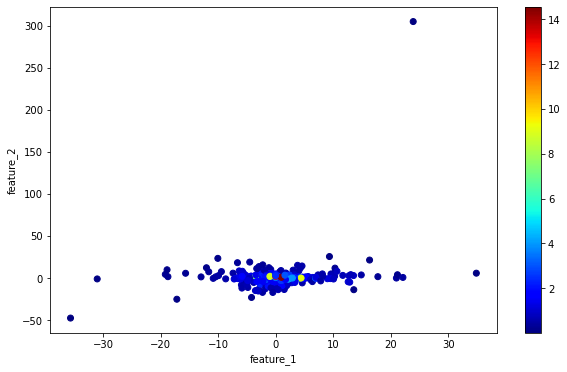

In [98]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(pathbased_data_new_delta.feature_1,pathbased_data_new_delta.feature_2,c=anomaly_score_avg,cmap='jet')
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
fig.colorbar(p)
plt.show()